In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()

In [3]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [5]:
x1 = X[:,0]
x2 = X[:,1]

In [6]:
x1.shape

(26,)

In [7]:
x2.shape

(26,)

In [8]:
x1[y==1]

array([ 9.96346605, 11.54155807,  8.30988863, 11.93027136,  8.34810316,
        8.67494727,  9.17748385, 10.24028948,  9.49123469,  9.25694192,
        7.99815287,  9.32298256,  9.15072323])

In [9]:
# for plotting with have to separate the points with y=1 and y=0
x1c = x1[y==1]
x1nc = x1[y==0]
x2c = x2[y==1]
x2nc = x2[y==0]

In [10]:
x1nc.shape

(13,)

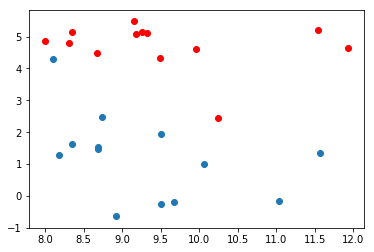

In [11]:
plt.scatter(x1c,x2c,color="r")
plt.scatter(x1nc,x2nc)

In [12]:
# find closest neighbor and return the classifier of that point
def firstneighbor(x1q,x2q,x1,x2,y):
    d = np.sqrt((x1-x1q)**2+(x2-x2q)**2)
    index = np.argsort(d)
    return y[index[0]]

In [13]:
firstneighbor(9.5,5,x1,x2,y)

1

In [14]:
# find k closeset neighbors and return averaged classifier
def kneighbor(x1q,x2q,x1,x2,y,k):
    d = np.sqrt((x1-x1q)**2+(x2-x2q)**2)
    index = np.argsort(d)
    y_avg = 0
    for i in index[:k]:
        y_avg=y_avg+y[i]
    y_avg=y_avg/k
    return int(round(y_avg))

In [15]:
kneighbor(8.5,3.8,x1,x2,y,3)

1

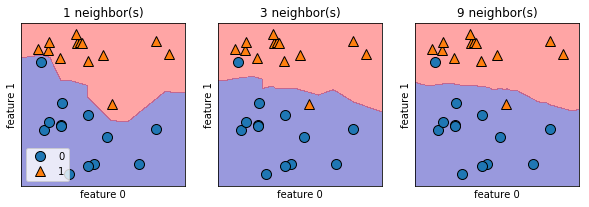

In [16]:
from sklearn.neighbors import KNeighborsClassifier
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

/Users/hstrey/miniconda3/envs/pymc3class/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


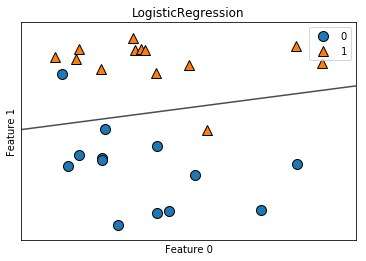

In [23]:
from sklearn.linear_model import LogisticRegression
X, y = mglearn.datasets.make_forge()

clf = LogisticRegression().fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title(clf.__class__.__name__)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()